In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import es_utils



df = pd.read_csv('output/table_2.csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43 non-null     float64
 1   label   43 non-null     object 
 2   C_kwh   43 non-null     float64
 3   ancat   43 non-null     object 
 4   type    43 non-null     object 
 5   ref     43 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.5+ KB


<AxesSubplot:>

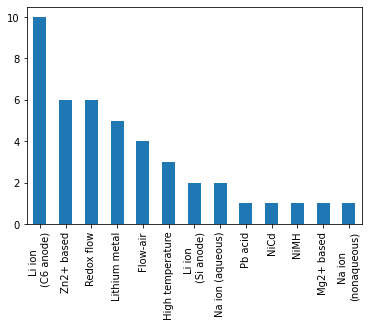

In [2]:
df['type'].value_counts().plot(kind='bar')

In [3]:

df_phys = df[['type','C_kwh','year']]
df_phys

,type,C_kwh,year
0,Pb acid,12.4,1859.0
1,NiCd,66.0,1899.0
2,NiMH,82.8,1978.0
3,Zn2+ based,5.8,1878.0
4,Zn2+ based,44.2,1899.0
5,Zn2+ based,9.0,1959.0
6,Zn2+ based,8.0,1972.0
7,Zn2+ based,9.3,2015.0
8,Zn2+ based,50.7,2016.0
9,Mg2+ based,358.7,2016.0


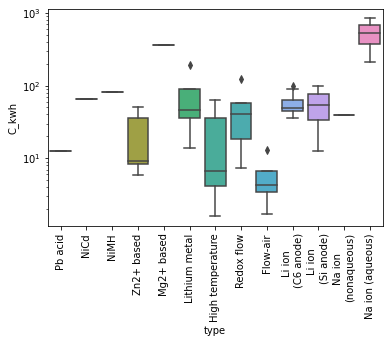

In [4]:
import seaborn as sns

sns.boxplot(x='type',y='C_kwh',data=df_phys)
plt.xticks(rotation=90)
plt.yscale('log')

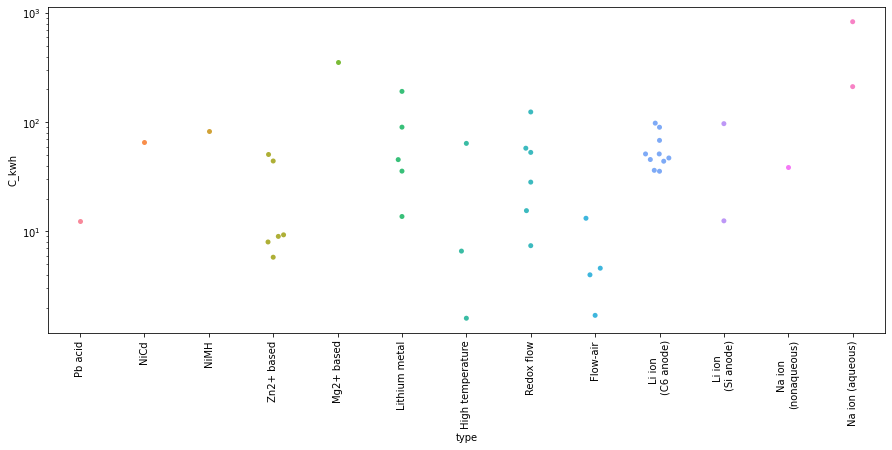

In [5]:

df_plot = df_phys#.where(df_phys['class'] == 'Glycols')

plt.figure(figsize = (15,6))
sns.swarmplot(x='type',y='C_kwh',data=df_plot)
plt.xticks(rotation=90)

plt.yscale('log')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Pb acid'),
  Text(1, 0, 'NiCd'),
  Text(2, 0, 'NiMH'),
  Text(3, 0, 'Zn2+ based'),
  Text(4, 0, 'Mg2+ based'),
  Text(5, 0, 'Lithium metal'),
  Text(6, 0, 'High temperature'),
  Text(7, 0, 'Redox flow'),
  Text(8, 0, 'Flow-air'),
  Text(9, 0, 'Li ion  \n(C6 anode)'),
  Text(10, 0, 'Li ion  \n(Si anode)'),
  Text(11, 0, 'Na ion \n(nonaqueous)'),
  Text(12, 0, 'Na ion (aqueous)')])

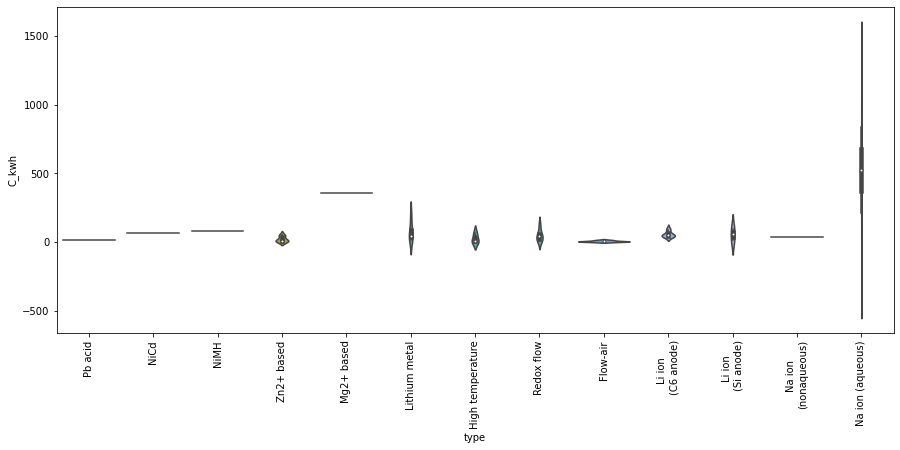

In [6]:

plt.figure(figsize = (15,6))
sns.violinplot(x='type',y='C_kwh',data=df_phys)
plt.xticks(rotation=90)
# plt.yscale('log')
# plt.ylim(1e1,)
# plt.ylim(0,)

Text(0.5, 0, 'C_kwh')

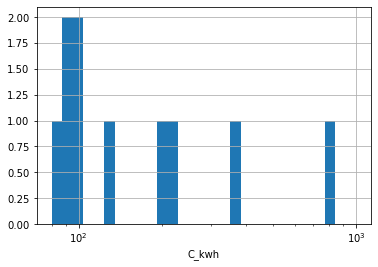

In [7]:
import numpy as np
bins = np.logspace(np.log10(8e1), np.log10(1e3), 30)
df['C_kwh'].hist(bins=bins)
plt.xscale('log')
plt.xlabel('C_kwh')

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='C_kwh', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='C_kwh'>,
        <AxesSubplot:xlabel='C_kwh', ylabel='C_kwh'>]], dtype=object)

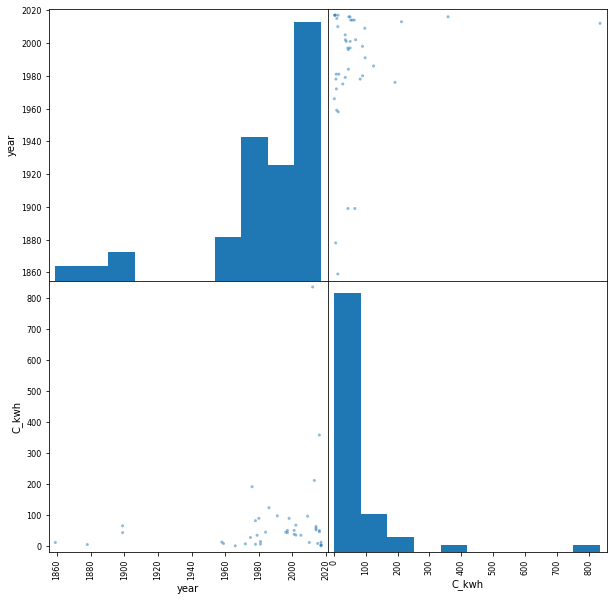

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))

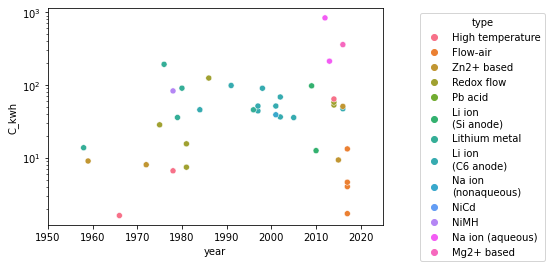

In [9]:

cols = ['type','year','C_kwh']
df_sel = df.dropna(subset=cols, how='any')[cols]
df_sel = df_sel.sort_values('C_kwh')
g = sns.scatterplot(data=df_sel, y='C_kwh', x='year', hue='type')
plt.yscale('log')
plt.xlim(1950,)

plt.gca().get_legend().set_bbox_to_anchor([0,0,1.5,1])

#plt.locator_params(axis='x', nbins=5)
#g.set_xticklabels(rotation=45)
#s = df_sel.set_index(['class','C_kwh'])['sp_latent_heat']
#s.groupby('class').plot(x='C_kwh')
#plt.legend()


In [10]:
df_table3 = pd.read_csv('output/table_3.csv', index_col=0)

df_table3

,,chemical,cost,ref,.1
0,NaN,Active carbon,30.000,41.0,NaN
1,NaN,AQDS,4.800,25.0,NaN
2,NaN,CaCl2,0.110,42.0,NaN
3,NaN,Carbonate Electrolyte,14.000,41.0,NaN
4,NaN,Cd(OH)2,3.430,42.0,NaN
5,NaN,CrCl3 6H2O,2.040,42.0,NaN
6,NaN,CuCl,4.550,42.0,NaN
7,NaN,Cu-PBA,10.000,44.0,NaN
8,NaN,FeCl2,2.530,42.0,NaN
9,NaN,DI H2O,0.001,45.0,NaN


<AxesSubplot:>

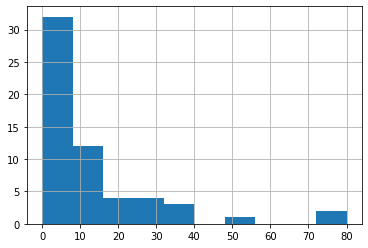

In [12]:

df_table3['cost'].hist()

(array([0]), [Text(0, 0, '')])

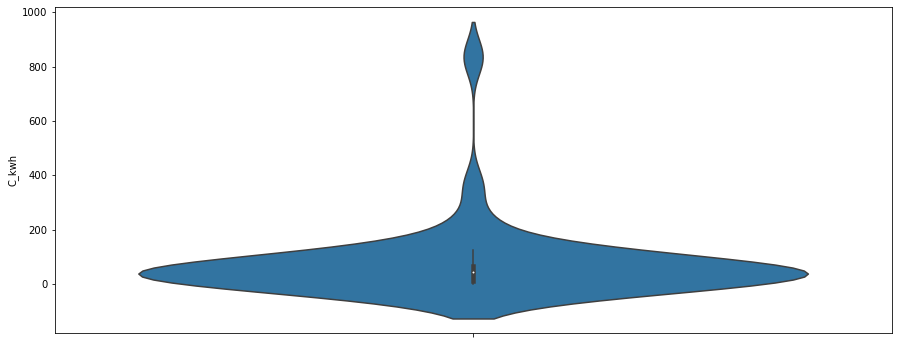

In [14]:

plt.figure(figsize = (15,6))
sns.violinplot(y='C_kwh',data=df_phys)
plt.xticks(rotation=90)